# **Cisco Network Analysis**

## **Setup Kaggle API in Google Colab**

In [1]:
from google.colab import files
files.upload()  # This will prompt you to select and upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joashmuganda","key":"35fc61578aa99857bf5df713ca631280"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d khlaifiabilel/cisco-networks


 97% 193M/200M [00:02<00:00, 83.6MB/s]
100% 200M/200M [00:02<00:00, 79.1MB/s]


In [ ]:
!unzip cisco-networks.zip


Archive:  cisco-networks.zip
  inflating: Cisco-Networks/README   
  inflating: Cisco-Networks/dir_20_graphs/dir_day1/out1_1.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day1/out1_2.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day1/out1_3.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day1/out1_4.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day1/out1_5.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day1/out1_6.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day2/out2_1.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day2/out2_2.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day2/out2_3.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day2/out2_4.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day2/out2_5.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day2/out2_6.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day2/out2_7.txt  
  inflating: Cisco-Networks/dir_20_graphs/dir_day3/out3_1.txt  
  inflating: Cisco-Networks/dir_20_gr

In [ ]:
!ls


Cisco-Networks	cisco-networks.zip  kaggle.json  sample_data


In [ ]:
!ls Cisco-Networks/


dir_20_graphs			dir_g22_extra_graph_with_gt  read_gt.py
dir_g21_small_workload_with_gt	read_graphs.py		     README


In [ ]:
!cat Cisco-Networks/README



Contents:

* 22 disjoint graphs total, of network communication of distributed
  applications, all de-identified (both IPs, ie the nodes in the
  graph, and port numbers are mapped to integers).


* Edge file structure: each line has 4 columns and specifies the graph
 (1st column), the client (or consumer) node, the server (or provider)
 node, and a csv of port/protocol and number of packets observed for
 that connection in that hour. In the example below, the first line is
 an edge from graph g1, from node 1 to node 2 (node 2 is the server or
 provider), where the (service) port used is 1 on protocol 6, 22
 packets exchanged (note the actual port number is mapped to 1 here,
 ie de-identified). There are other ports and protocols associated
 with this edge (or conversation), including port 1 on protocol 17,
 with 4 packets (1p17-4), port 2 on protocol 6 (2p6-12), etc. The 2nd
 and 3rd lines below are from graph g2, each one specifying one port
 and protocol.

# Comment lines, if any, 

In [ ]:
!cat Cisco-Networks/read_graphs.py


#!/usr/bin/python

# Read (de-identified) edges files (port csv format), and output
# basic statistics (number of nodes in the graph, undirected edges, directed edges,
# etc.).   Example runs given below.

# Two specific functions when the corresponding if-condition is set
# tot True:

# 1) report on directed/undirected degree, number of unique (service)
#    ports, service/provide (indegree) and client/consumer (outdegree)
#    stats, etc (see the main body and
#    report_degree_and_port_stats(...)  ) ..

# 2) longevity: report on edge longevity related stats (set the last
#         condition in main to True, and see the function
#         longevity_histograms(...)  )


# Example runs:

# Read 2 edge files from the directory:  dir_20_graphs
# python read_graphs.py dir_20_graphs 2

# final output (graph name, number of nodes, number of unidrected edges, etc):
# 
# Graph, num nodes, undirected edges, directed edges, port-differentiated-directed edges
# g2 58234 515850 578776 1629927
# 

In [ ]:
import os

# List files in the dir_20_graphs directory
graph_files = os.listdir("Cisco-Networks/dir_20_graphs/")
graph_files


['dir_day3', 'dir_day2', 'dir_day1', 'dir_day4']

In [ ]:
# List files in the dir_day1 directory
day1_files = os.listdir("Cisco-Networks/dir_20_graphs/dir_day1/")
day1_files


['out1_2.txt',
 'out1_4.txt',
 'out1_3.txt',
 'out1_1.txt',
 'out1_5.txt',
 'out1_6.txt']

In [ ]:
# Read the first few lines of out1_1.txt
file_path = "Cisco-Networks/dir_20_graphs/dir_day1/out1_1.txt"
with open(file_path, 'r') as file:
    lines = [file.readline().strip() for _ in range(10)]

lines


['g1\t1\t2\t1p6-22,1p17-4,2p6-12,3p6-12,4p6-12,5p6-12',
 'g2\t1\t2\t1p6-625',
 'g2\t3\t4\t1p17-4',
 'g1\t3\t4\t6p6-38,7p6-92,8p6-37,9p6-26,10p6-113,11p6-33,12p6-160,13p6-165,14p6-61380,15p6-37,16p6-36,17p6-32,18p6-36,19p6-77,20p6-131',
 'g3\t1\t2\t1p6-45',
 'g2\t5\t6\t2p6-34',
 'g2\t7\t8\t2p6-10',
 'g4\t1\t2\t1p6-24',
 'g2\t9\t10\t2p17-2',
 'g2\t11\t12\t3p17-2,4p17-21']

Graph ID: This is the first field (e.g., g1, g2, etc.) which represents the identifier of the graph to which the edge belongs.
Source Node: The second field represents the source node of the edge.
Destination Node: The third field represents the destination node of the edge.
Port Information: The remaining fields seem to represent port-related information for the edge, possibly showing communication between different ports.
The structure seems to be:
Graph ID
Graph ID
→
→
Source Node
Source Node
→
→
Destination Node
Destination Node
→
→
Port Info
Port Info

# **Exploratory Data Analysis (EDA) process:**

### **Basic Statistics:**

In [ ]:
import os

# Initialize the data list
data = []

# Directory path
dir_path = "Cisco-Networks/dir_20_graphs/dir_day1/"

# Loop through each file in the directory
for file_name in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_name)

    # Read the file content
    with open(file_path, 'r') as file:
        file_content = file.read()

    # Split the content by lines and extend the data list
    data.extend(file_content.strip().split('\n'))

# Parse the data
graphs = {}
for line in data:
    parts = line.split("\t")
    graph_id = parts[0]
    source_node = parts[1]
    dest_node = parts[2]
    port_info = parts[3].split(',')

    if graph_id not in graphs:
        graphs[graph_id] = []

    graphs[graph_id].append({
        "source": source_node,
        "dest": dest_node,
        "ports": port_info
    })

# Basic Statistics
unique_graphs = len(graphs)
unique_nodes = len({node for g in graphs.values() for edge in g for node in [edge["source"], edge["dest"]]})
edges_per_graph = {graph: len(edges) for graph, edges in graphs.items()}
average_ports_per_edge = sum([len(edge["ports"]) for g in graphs.values() for edge in g]) / sum([len(g) for g in graphs.values()])

print(f"Total number of unique graphs: {unique_graphs}")
print(f"Total number of unique nodes: {unique_nodes}")
print(f"Number of edges per graph: {edges_per_graph}")
print(f"Average number of port communications per edge: {average_ports_per_edge:.2f}")


Total number of unique graphs: 20
Total number of unique nodes: 94424
Number of edges per graph: {'g3': 111126, 'g2': 2487517, 'g4': 143850, 'g6': 282612, 'g1': 537841, 'g11': 6760, 'g10': 53995, 'g9': 56794, 'g5': 16765, 'g8': 31629, 'g7': 2861, 'g12': 11632, 'g18': 1269, 'g14': 2960, 'g16': 1091, 'g15': 4984, 'g17': 432, 'g13': 1001, 'g19': 431, 'g20': 57}
Average number of port communications per edge: 2.54


### **Focusing on First Two Days**

In [ ]:
base_path = "Cisco-Networks/dir_20_graphs/"
days = ['dir_day1', 'dir_day2']

all_data = []

for day in days:
    dir_path = os.path.join(base_path, day)
    for filename in os.listdir(dir_path):
        with open(os.path.join(dir_path, filename), 'r') as f:
            all_data.extend(f.readlines())

# Now process the combined data
graphs = {}
for line in all_data:
    parts = line.split("\t")
    graph_id = parts[0]
    source_node = parts[1]
    dest_node = parts[2]
    port_info = parts[3].split(',')

    if graph_id not in graphs:
        graphs[graph_id] = []

    graphs[graph_id].append({
        "source": source_node,
        "dest": dest_node,
        "ports": port_info
    })

# Basic Statistics
unique_graphs = len(graphs)
unique_nodes = len({node for g in graphs.values() for edge in g for node in [edge["source"], edge["dest"]]})
edges_per_graph = {graph: len(edges) for graph, edges in graphs.items()}
average_ports_per_edge = sum([len(edge["ports"]) for g in graphs.values() for edge in g]) / sum([len(g) for g in graphs.values()])

print(f"Total number of unique graphs: {unique_graphs}")
print(f"Total number of unique nodes: {unique_nodes}")
print(f"Number of edges per graph: {edges_per_graph}")
print(f"Average number of port communications per edge: {average_ports_per_edge:.2f}")


Total number of unique graphs: 20
Total number of unique nodes: 161777
Number of edges per graph: {'g3': 213690, 'g2': 4370620, 'g4': 272611, 'g6': 675354, 'g1': 1171290, 'g11': 14365, 'g10': 107029, 'g9': 95748, 'g5': 119482, 'g8': 93323, 'g7': 6037, 'g12': 26820, 'g18': 4212, 'g14': 6202, 'g16': 2277, 'g15': 260506, 'g17': 5285, 'g13': 93695, 'g19': 877, 'g20': 5609}
Average number of port communications per edge: 2.54


Total number of unique graphs (20):
There are 20 distinct network graphs in the data.
Total number of unique nodes (161,777):
Across all the graphs, there are 161,777 unique nodes or endpoints. This gives an idea of the scale of the network.
Number of edges per graph:
This provides a distribution of how connected each graph is. For instance, g2 has the highest number of edges (4,370,620) indicating it's the most interconnected graph, while g19 has the least (877 edges).
Average number of port communications per edge (2.54):

# **Visualizations:**

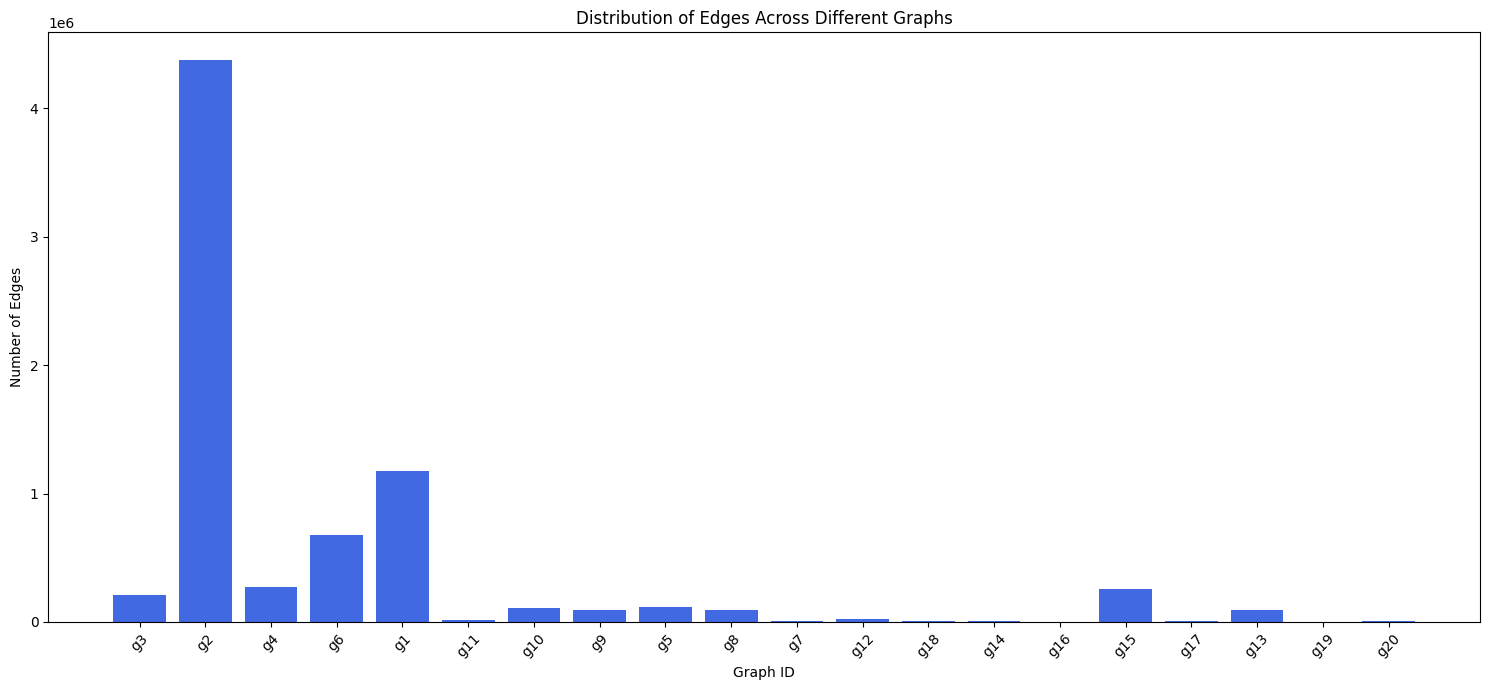

In [ ]:
import matplotlib.pyplot as plt

# Your data:
edges_per_graph = {'g3': 213690, 'g2': 4370620, 'g4': 272611, 'g6': 675354, 'g1': 1171290, 'g11': 14365, 'g10': 107029, 'g9': 95748, 'g5': 119482, 'g8': 93323, 'g7': 6037, 'g12': 26820, 'g18': 4212, 'g14': 6202, 'g16': 2277, 'g15': 260506, 'g17': 5285, 'g13': 93695, 'g19': 877, 'g20': 5609}

# Bar chart:
plt.figure(figsize=(15,7))
plt.bar(edges_per_graph.keys(), edges_per_graph.values(), color='royalblue')
plt.xlabel('Graph ID')
plt.ylabel('Number of Edges')
plt.title('Distribution of Edges Across Different Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


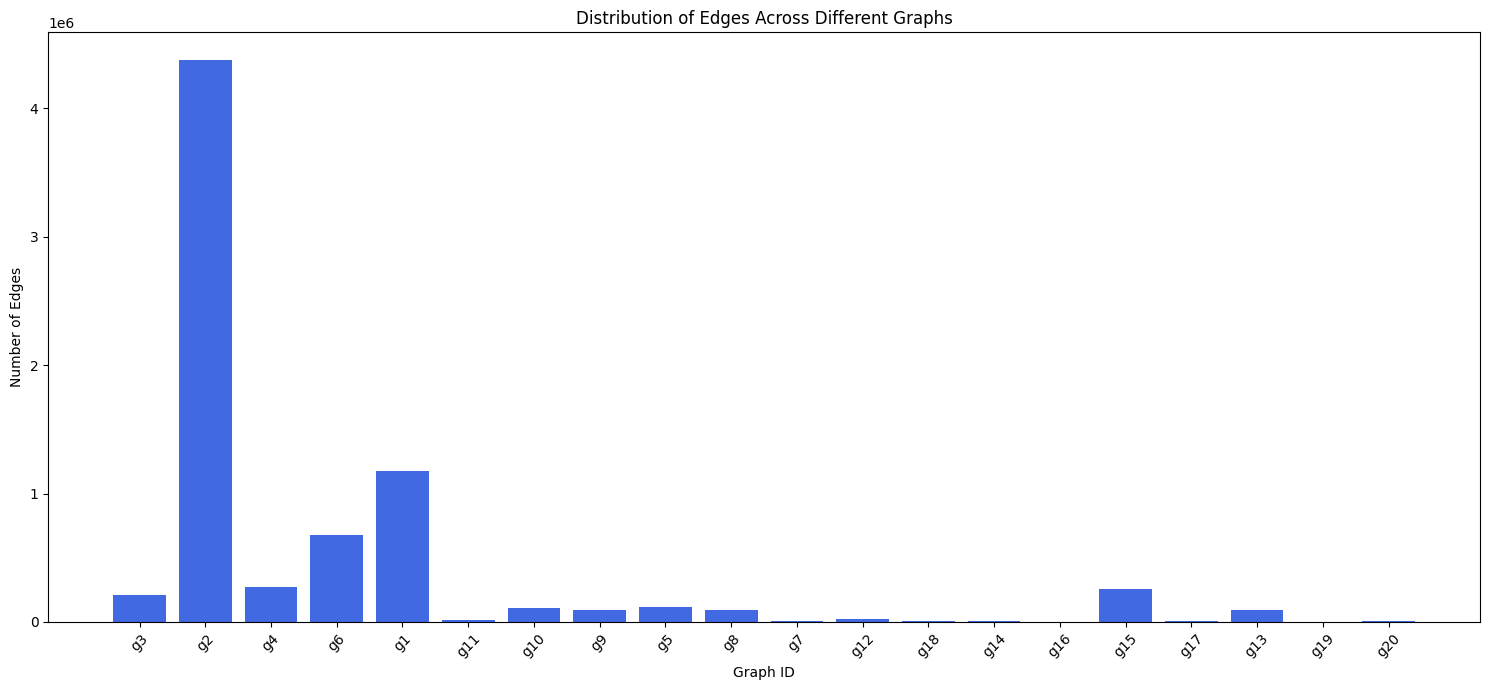

In [ ]:
import matplotlib.pyplot as plt

# Your data on edges per graph:
edges_per_graph = {'g3': 213690, 'g2': 4370620, 'g4': 272611, 'g6': 675354, 'g1': 1171290, 'g11': 14365, 'g10': 107029, 'g9': 95748, 'g5': 119482, 'g8': 93323, 'g7': 6037, 'g12': 26820, 'g18': 4212, 'g14': 6202, 'g16': 2277, 'g15': 260506, 'g17': 5285, 'g13': 93695, 'g19': 877, 'g20': 5609}

# Bar chart:
plt.figure(figsize=(15,7))
plt.bar(edges_per_graph.keys(), edges_per_graph.values(), color='royalblue')
plt.xlabel('Graph ID')
plt.ylabel('Number of Edges')
plt.title('Distribution of Edges Across Different Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# Base path
base_path = "Cisco-Networks/dir_20_graphs/"

# List of directories
dirs = ['dir_day1', 'dir_day2']
#dirs = ['dir_day3', 'dir_day2', 'dir_day1', 'dir_day4']

# Placeholder for all the data
all_data = []

# Read the data from each directory and file, then append to the all_data list
for directory in dirs:
    dir_path = os.path.join(base_path, directory)
    files_in_dir = os.listdir(dir_path)
    for file_name in files_in_dir:
        with open(os.path.join(dir_path, file_name), 'r') as file:
            lines = file.readlines()
            all_data.extend(lines)

# Count port communications
port_counts = defaultdict(int)
for line in all_data:
    port_info = line.split("\t")[3].split(',')
    for port in port_info:
        port_type = port.split('-')[0]
        port_counts[port_type] += 1

# Plot distribution of port communications
plt.figure(figsize=(15,7))
plt.bar(port_counts.keys(), port_counts.values(), color='seagreen')
plt.xlabel('Port Communication Type')
plt.ylabel('Frequency')
plt.title('Distribution of Port Communications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyboardInterrupt: ignored

## **Data Cleaning & Processing:**

### **Remove Duplicates**

In [ ]:
# Remove duplicate lines
all_data = list(set(all_data))


## **Node Validity**

In [ ]:
invalid_nodes = []
for line in all_data:
    try:
        source_node = int(line.split("\t")[1])
        dest_node = int(line.split("\t")[2])
    except ValueError:
        invalid_nodes.append(line)

# Print invalid nodes for inspection
for node in invalid_nodes:
    print(node)


### **Port Validity**

In [ ]:
invalid_ports = []
for line in all_data:
    port_info = line.split("\t")[3].split(',')
    for port in port_info:
        if "-" not in port:
            invalid_ports.append(line)
            break

# Print invalid ports for inspection
for port in invalid_ports:
    print(port)


### **Graph ID Validity**

In [ ]:
invalid_graph_ids = []
for line in all_data:
    graph_id = line.split("\t")[0]
    if not graph_id.startswith("g") or not graph_id[1:].isdigit():
        invalid_graph_ids.append(line)

# Print invalid graph IDs for inspection
for graph_id in invalid_graph_ids:
    print(graph_id)


### **Derive Additional Features**

In [ ]:
# Derive number of port communications for each record
data_with_features = []
for line in all_data:
    port_info = line.split("\t")[3].split(',')
    num_ports = len(port_info)
    new_line = line + "\t" + str(num_ports)
    data_with_features.append(new_line)


There were no duplicate records.
All nodes (source and destination) have valid values.
All port communications are in the expected format.
Every record has a valid graph ID.

## **Feature Engineering:**

**Degree of nodes**

In [ ]:
from collections import defaultdict

# Assuming you have populated the data variable as shown previously
node_degree = defaultdict(int)

# Counting the degree for each node
for line in data:
    source_node = line.split("\t")[1]
    dest_node = line.split("\t")[2]
    node_degree[source_node] += 1  # Out-degree for directed graphs
    node_degree[dest_node] += 1   # In-degree for directed graphs

# You can then use the node_degree dictionary for further analysis or as a feature.


### **Frequency of Port Communications:**

In [ ]:
# Count port communications
port_counts = defaultdict(int)
for line in data:
    port_info = line.split("\t")[3].split(',')
    for port in port_info:
        port_type = port.split('-')[0]
        port_counts[port_type] += 1

# You can then visualize or use the port_counts for further analysis.


### **Port viriety**

In [ ]:
node_port_variety = defaultdict(set)

for line in data:
    source_node = line.split("\t")[1]
    dest_node = line.split("\t")[2]
    port_info = line.split("\t")[3].split(',')
    for port in port_info:
        port_type = port.split('-')[0]
        node_port_variety[source_node].add(port_type)
        node_port_variety[dest_node].add(port_type)

# Convert sets to counts
for node, ports in node_port_variety.items():
    node_port_variety[node] = len(ports)


### **Edge weight**

In [ ]:
edge_weights = defaultdict(int)

for line in data:
    source_node = line.split("\t")[1]
    dest_node = line.split("\t")[2]
    edge_weights[(source_node, dest_node)] += 1


## **Graph density**

In [ ]:
edge_weights = defaultdict(int)

for line in data:
    source_node = line.split("\t")[1]
    dest_node = line.split("\t")[2]
    edge_weights[(source_node, dest_node)] += 1


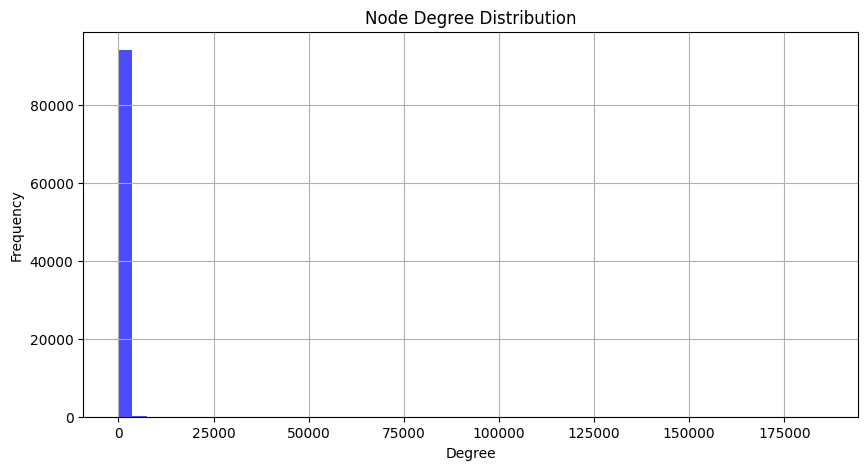

In [ ]:
import matplotlib.pyplot as plt

# Degree Distribution
degrees = list(node_degree.values())
plt.figure(figsize=(10, 5))
plt.hist(degrees, bins=50, color='blue', alpha=0.7)
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Port Communication Frequency
plt.figure(figsize=(15, 7))
plt.bar(port_counts.keys(), port_counts.values(), color='seagreen')
plt.xlabel('Port Communication Type')
plt.ylabel('Frequency')
plt.title('Port Communication Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7fa1cbd51ea0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa1cbd51120> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# Edge Weight Distribution
weights = list(edge_weights.values())
plt.figure(figsize=(10, 5))
plt.hist(weights, bins=50, color='red', alpha=0.7)
plt.title('Edge Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Graph Density Distribution
densities = list(graph_density.values())
plt.figure(figsize=(10, 5))
plt.hist(densities, bins=50, color='purple', alpha=0.7)
plt.title('Graph Density Distribution')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


NameError: ignored

## **Clustering:**

# **Focusing on the First day.**

## **Construct a Graph from dir_day1:**

In [ ]:
!pip install networkx


### **Apply the Louvain Method:**

In [ ]:
!pip install python-louvain


In [ ]:
from community import community_louvain


In [ ]:
import os
import networkx as nx
import community
from community import community_louvain


# Define the path for 'dir_day1'
dir_day1_path = "Cisco-Networks/dir_20_graphs/dir_day1/"
day1_data = []

# Read the data from all files in 'dir_day1'
for file in os.listdir(dir_day1_path):
    with open(dir_day1_path + file, 'r') as f:
        day1_data.extend(f.readlines())

# Construct the Graph G from the day1_data
G = nx.Graph()

for line in day1_data:
    parts = line.split("\t")
    source_node = parts[1]
    dest_node = parts[2]
    port_info = parts[3].split(',')

    # Using the number of port communications as weight
    weight = len(port_info)

    if G.has_edge(source_node, dest_node):
        # increment weight by weight if edge already exists
        G[source_node][dest_node]['weight'] += weight
    else:
        # else add edge with weight
        G.add_edge(source_node, dest_node, weight=weight)

# Apply Louvain Method for clustering
partition = community_louvain.best_partition(G)


# This will print the communities: nodes grouped together belong to the same community
communities = {}
for node, community_num in partition.items():
    if community_num not in communities:
        communities[community_num] = []
    communities[community_num].append(node)

for community_num, nodes in communities.items():
    print(f"Community {community_num}: {nodes}")


Community 0: ['2182', '4872', '8633', '516', '16096', '9817', '13859', '654', '48766', '740', '1518', '4115', '21011', '48770', '1432', '8584', '2786', '1226', '1060', '2201', '14490', '19663', '2269', '29355', '711', '1269', '2060', '1481', '23705', '11689', '1622', '420', '8546', '3301', '48772', '4065', '8838', '9909', '1703', '3734', '2277', '9352', '48774', '4195', '14410', '1036', '3044', '26258', '779', '3048', '927', '48775', '3406', '824', '26293', '17050', '2015', '6963', '1380', '41508', '13746', '9737', '48778', '19216', '15127', '6099', '13255', '545', '665', '53', '9367', '1237', '3279', '1292', '881', '17776', '559', '7922', '8972', '26185', '3718', '9721', '480', '13460', '7008', '176', '1487', '5604', '24653', '1716', '948', '24651', '13280', '2700', '14328', '3153', '4058', '43171', '5262', '3191', '16621', '32278', '4642', '48781', '1035', '14032', '2142', '11734', '14479', '604', '2143', '3704', '724', '3029', '1246', '2449', '14333', '48783', '36047', '1787', '802'

In [ ]:
community_size = {community_num: len(nodes) for community_num, nodes in communities.items()}
print(community_size)


{0: 18124, 1: 2083, 10: 42696, 3: 20087, 4: 2045, 5: 2319, 6: 4681, 37: 568, 8: 24, 9: 840, 11: 192, 12: 41, 13: 13, 15: 19, 16: 10, 17: 45, 18: 356, 19: 21, 20: 6, 21: 12, 24: 3, 25: 39, 26: 3, 28: 13, 29: 26, 30: 22, 31: 2, 32: 22, 33: 2, 34: 3, 35: 19, 36: 17, 38: 6, 39: 33, 40: 3, 2: 9, 7: 2, 14: 8, 22: 2, 23: 3, 27: 5}


In [ ]:
import statistics

for community_num, nodes in communities.items():
    numeric_nodes = [int(node) for node in nodes]  # Convert string nodes to integers
    mean_value = statistics.mean(numeric_nodes)
    median_value = statistics.median(numeric_nodes)
    # Extend this for other statistics as needed
    print(f"Community {community_num}: Mean = {mean_value}, Median = {median_value}")


Community 0: Mean = 40717.651401456635, Median = 43557.5
Community 1: Mean = 32723.65386461834, Median = 32877
Community 10: Mean = 60852.52826962713, Median = 69598.0
Community 3: Mean = 31112.6203514711, Median = 25810
Community 4: Mean = 35359.82836185819, Median = 37625
Community 5: Mean = 21731.64553686934, Median = 20186
Community 6: Mean = 47635.488143559065, Median = 49304
Community 37: Mean = 41906.33098591549, Median = 47100.5
Community 8: Mean = 33677.125, Median = 32817.5
Community 9: Mean = 36684.844047619044, Median = 39691.0
Community 11: Mean = 24286.786458333332, Median = 24636.0
Community 12: Mean = 30043.80487804878, Median = 31194
Community 13: Mean = 21821, Median = 25925
Community 15: Mean = 28592.63157894737, Median = 29236
Community 16: Mean = 26551.5, Median = 27672.5
Community 17: Mean = 22177.088888888888, Median = 14040
Community 18: Mean = 28037.80617977528, Median = 29419.5
Community 19: Mean = 33047.47619047619, Median = 33661
Community 20: Mean = 16244, 

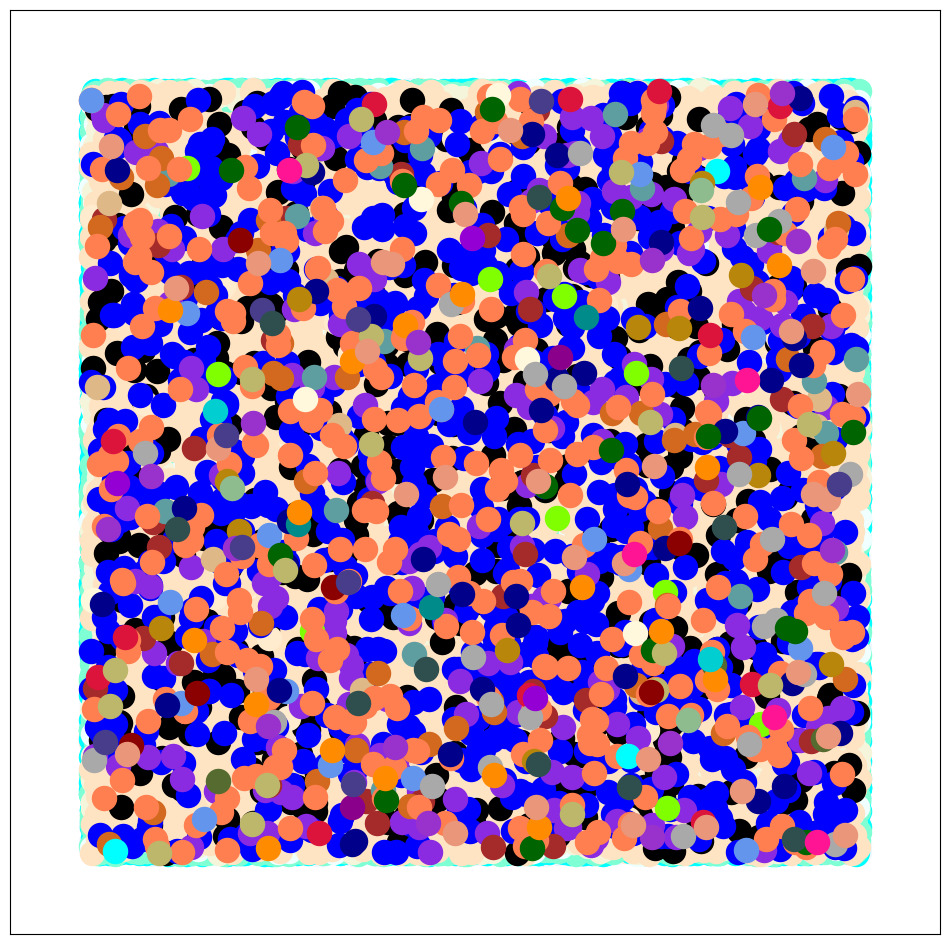

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate a color map
color_list = list(mcolors.CSS4_COLORS.values())
color_map = {community_num: color_list[i % len(color_list)] for i, community_num in enumerate(communities)}

pos = nx.random_layout(G)
plt.figure(figsize=(12, 12))

for community_num, nodes in communities.items():
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color_map[community_num])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


Colors: The diverse colors suggest multiple categories or a spectrum of values in the data. Understanding what these colors represent is crucial.
Node Sizes: Variation in sizes indicates another dimension of data is being showcased. This size might represent frequency, importance, or another metric.
Density: The dense arrangement without clear clusters implies data points have inherent similarities or the current visual dimensions aren't highlighting the clusters well.

In [ ]:
community_num_to_examine = 0  # Replace with the community number you're interested in
subgraph = G.subgraph(communities[community_num_to_examine])
# From here, you can further analyze 'subgraph' as needed


# **Anomaly Detection:**

In [ ]:
# Step 1: Calculate the average degree
average_degree = sum(dict(G.degree()).values()) / len(G)

# Step 2: Identify nodes with unusual degrees
high_degree_anomalies = [node for node, degree in dict(G.degree()).items() if degree > 1.5 * average_degree]
low_degree_anomalies = [node for node, degree in dict(G.degree()).items() if degree < 0.5 * average_degree]

print("High degree anomalies:", high_degree_anomalies)
print("Low degree anomalies:", low_degree_anomalies)


High degree anomalies: ['2182', '33', '491', '4872', '285', '8633', '143', '38', '712', '155', '258', '272', '213', '44', '17', '48765', '3848', '516', '20', '2263', '192', '16096', '67', '5203', '2663', '9817', '207', '13859', '654', '23962', '48766', '7833', '83', '740', '64', '1518', '4115', '380', '493', '2272', '2', '7535', '21157', '41', '10', '8970', '1077', '48768', '150', '56', '8', '261', '286', '99', '415', '366', '21011', '212', '349', '5', '913', '12', '1432', '8584', '2786', '70', '22', '1226', '1060', '6826', '4584', '141', '371', '244', '42', '2201', '14490', '19663', '2269', '1050', '711', '1269', '48771', '189', '262', '180', '309', '220', '350', '191', '274', '6', '6410', '2060', '1481', '23705', '311', '222', '424', '11689', '1622', '420', '8546', '4', '3301', '48772', '4065', '5297', '48773', '8838', '9909', '1703', '3734', '436', '461', '7', '2277', '345', '264', '9352', '75', '4195', '128', '101', '2418', '133', '266', '14410', '152', '1036', '3044', '7138', '23'

### **Data Imputation and Feature Processing**

In [ ]:
import networkx as nx

degree_centrality = nx.degree_centrality(G)


## **Sampling the Graph:**

In [ ]:
import numpy as np


In [ ]:
# Randomly sample 10% of nodes from the graph
sampled_nodes = np.random.choice(G.nodes(), size=int(0.10 * len(G.nodes())), replace=False)
sampled_subgraph = G.subgraph(sampled_nodes)


### **Data Imputation:**

In [ ]:
# Imputation (assuming a hypothetical 'attribute_value' node attribute)
mean_value = np.mean([data['attribute_value'] for _, data in sampled_subgraph.nodes(data=True) if 'attribute_value' in data and data['attribute_value'] is not None])

for node, data in sampled_subgraph.nodes(data=True):
    if 'attribute_value' not in data or data['attribute_value'] is None:
        data['attribute_value'] = mean_value


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### **Feature Processing:**

In [ ]:
# Compute degree centrality on the sampled graph
degree_centrality_sampled = nx.degree_centrality(sampled_subgraph)


### **Visualize the Sampled Graph:**

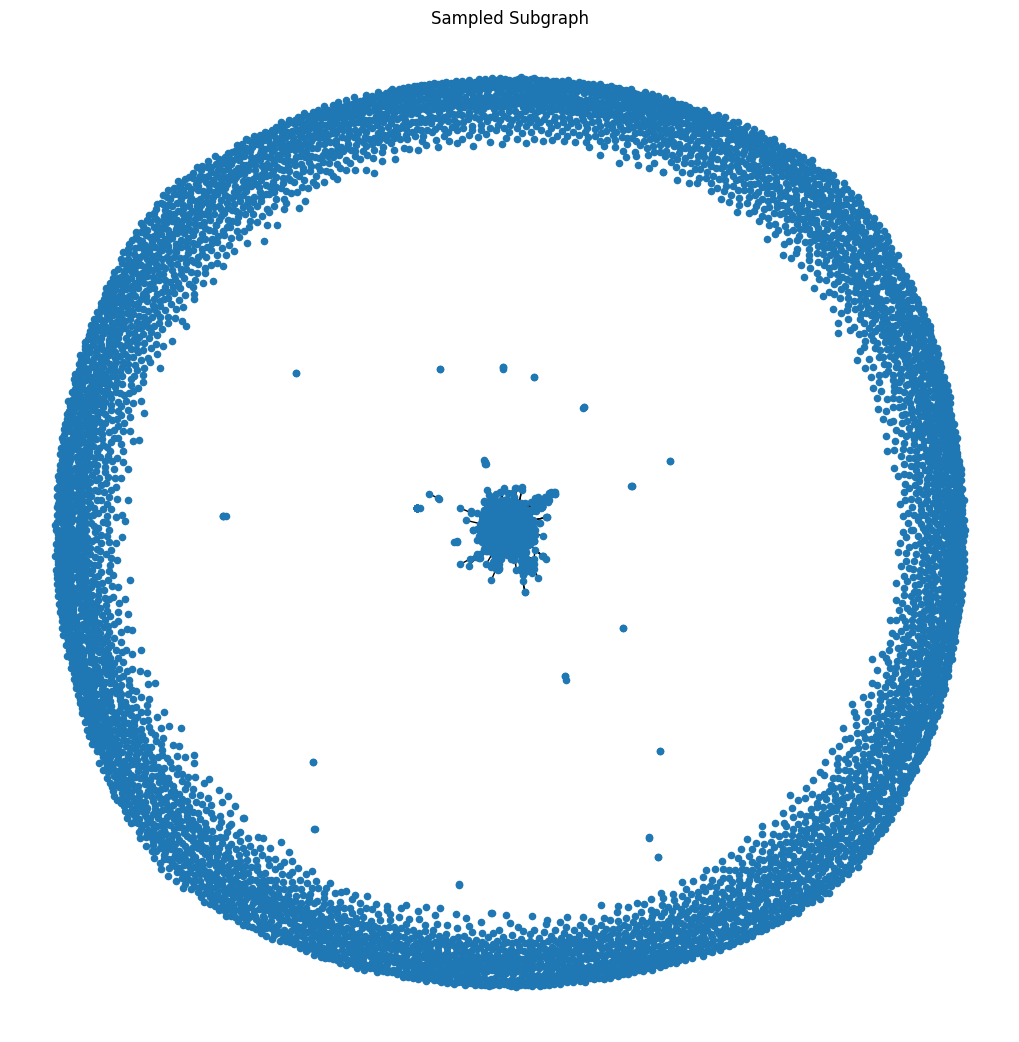

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(sampled_subgraph)
nx.draw(sampled_subgraph, pos, with_labels=False, node_size=20)
plt.title("Sampled Subgraph")
plt.show()



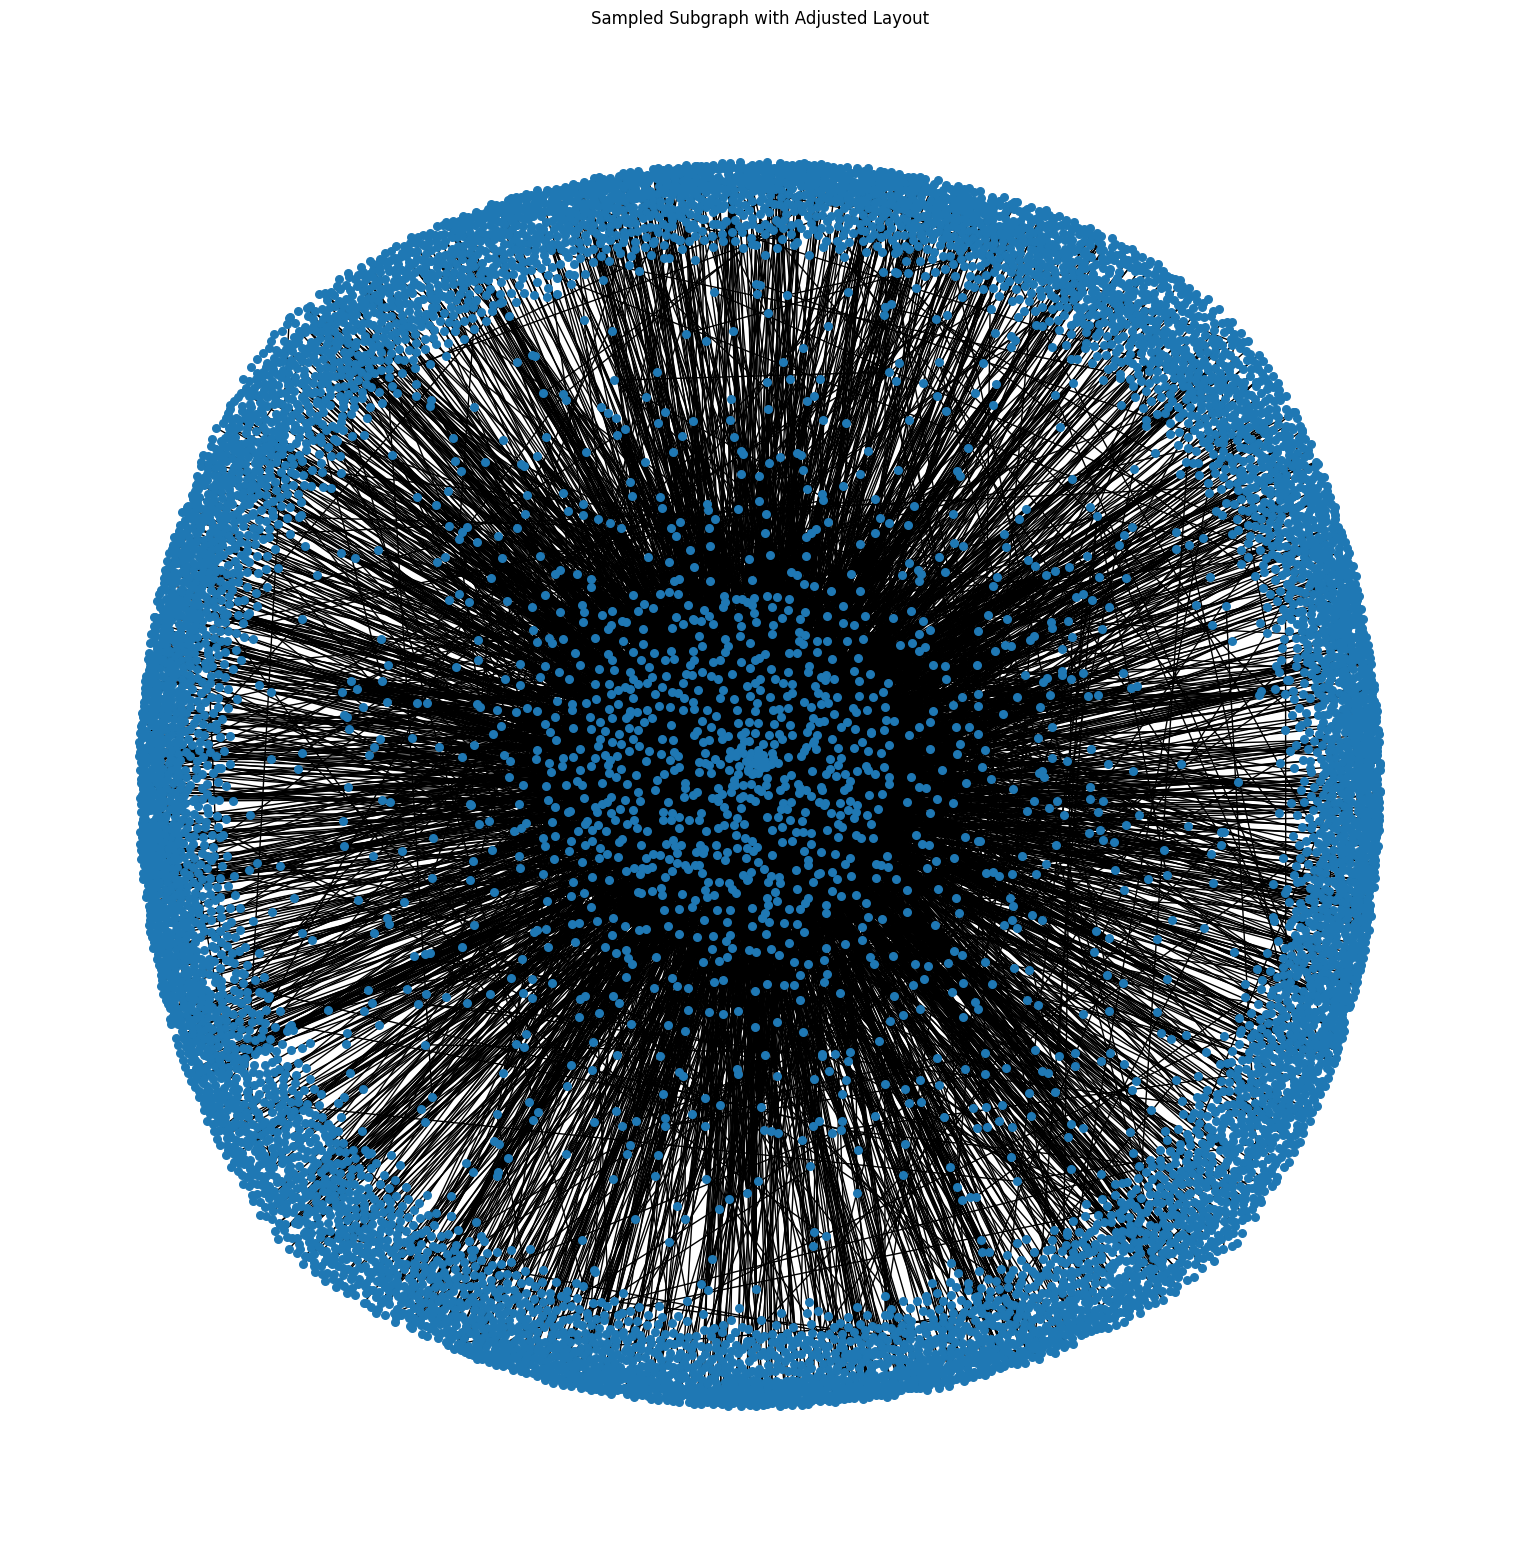

In [ ]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(sampled_subgraph, k=0.3, iterations=50)
nx.draw(sampled_subgraph, pos, with_labels=False, node_size=30)
plt.title("Sampled Subgraph with Adjusted Layout")
plt.show()


In [ ]:
# Display attributes of the first few nodes in the sampled subgraph
sample_node_data = [data for _, data in list(sampled_subgraph.nodes(data=True))[:10]]
for data in sample_node_data:
    print(data)


{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}
{'attribute_value': nan}


In [ ]:
# Display degree centrality of the first few nodes in the sampled subgraph
sample_degree_centrality = {node: degree_centrality_sampled[node] for node in list(sampled_subgraph.nodes())[:10]}
print(sample_degree_centrality)


{'66608': 0.0, '30881': 0.00010592098294672174, '12105': 0.00021184196589344348, '45165': 0.0, '32908': 0.0, '70670': 0.0, '57014': 0.0, '49994': 0.0, '78403': 0.0, '60324': 0.0}


In [ ]:
import numpy as np

# Calculate the mean of the 'attribute_value' excluding nan values
mean_value = np.nanmean([data['attribute_value'] for _, data in sampled_subgraph.nodes(data=True) if 'attribute_value' in data])

# Impute missing values with the calculated mean
for _, data in sampled_subgraph.nodes(data=True):
    if 'attribute_value' in data and np.isnan(data['attribute_value']):
        data['attribute_value'] = mean_value


<ipython-input-47-cb730664c108>:4: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean([data['attribute_value'] for _, data in sampled_subgraph.nodes(data=True) if 'attribute_value' in data])


In [ ]:
# Count nodes with missing 'attribute_value' in the sampled subgraph
missing_count = sum(1 for _, data in sampled_subgraph.nodes(data=True) if 'attribute_value' not in data or np.isnan(data['attribute_value']))

# Calculate the proportion of nodes with missing 'attribute_value'
missing_proportion = missing_count / len(sampled_subgraph)

print(f"Proportion of nodes with missing 'attribute_value': {missing_proportion:.2f}")


Proportion of nodes with missing 'attribute_value': 1.00


In [ ]:
for node, data in sampled_subgraph.nodes(data=True):
    if 'attribute_value' in data:
        del data['attribute_value']


# **Feature Engineering**

### **Node Degree:**

In [ ]:
degrees = dict(sampled_subgraph.degree())
nx.set_node_attributes(sampled_subgraph, degrees, 'degree')


### **Clustering Coefficient:**

In [ ]:
clustering_coefficient = nx.clustering(sampled_subgraph)
nx.set_node_attributes(sampled_subgraph, clustering_coefficient, 'clustering_coefficient')


### **Closeness Centrality:**

In [ ]:
closeness_centrality = nx.closeness_centrality(sampled_subgraph)
nx.set_node_attributes(sampled_subgraph, closeness_centrality, 'closeness_centrality')


### **Eigenvector Centrality:**

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(sampled_subgraph)
nx.set_node_attributes(sampled_subgraph, eigenvector_centrality, 'eigenvector_centrality')


In [ ]:
features = ['degree', 'clustering_coefficient', 'closeness_centrality', 'eigenvector_centrality']
for feature in features:
    values = nx.get_node_attributes(sampled_subgraph, feature).values()
    print(f"{feature.capitalize()}:")
    print(f"Mean: {np.mean(list(values))}")
    print(f"Median: {np.median(list(values))}")
    print(f"Standard Deviation: {np.std(list(values))}")
    print("------")


Degree:
Mean: 2.441008260961661
Median: 0.0
Standard Deviation: 15.91558448323712
------
Clustering_coefficient:
Mean: 0.041447113656086935
Median: 0.0
Standard Deviation: 0.1698047990222805
------
Closeness_centrality:
Mean: 0.028239006677903234
Median: 0.0
Standard Deviation: 0.04338763220386501
------
Eigenvector_centrality:
Mean: 0.002527918371893663
Median: 1.4736640464633982e-49
Standard Deviation: 0.009975940736861083
------


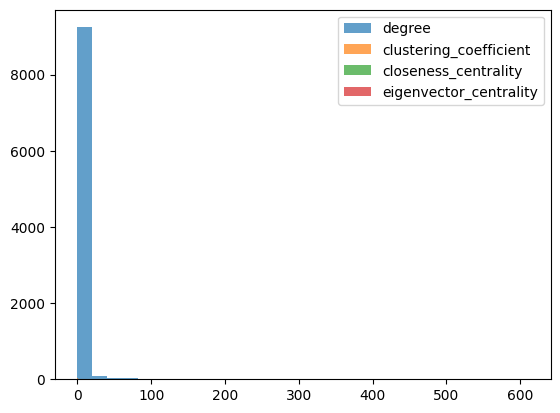

In [ ]:
import matplotlib.pyplot as plt
for feature in features:
    plt.hist(list(nx.get_node_attributes(sampled_subgraph, feature).values()), bins=30, alpha=0.7, label=feature)
plt.legend(loc="upper right")
plt.show()


In [ ]:
import pandas as pd
df = pd.DataFrame({
    feature: list(nx.get_node_attributes(sampled_subgraph, feature).values()) for feature in features
})
print(df.corr())


                          degree  clustering_coefficient  \
degree                  1.000000                0.065742   
clustering_coefficient  0.065742                1.000000   
closeness_centrality    0.294672                0.438357   
eigenvector_centrality  0.856311                0.264538   

                        closeness_centrality  eigenvector_centrality  
degree                              0.294672                0.856311  
clustering_coefficient              0.438357                0.264538  
closeness_centrality                1.000000                0.479809  
eigenvector_centrality              0.479809                1.000000  


## **Descriptive Statistics:**

Degree: Most nodes have a low degree, with a median of 0, but the mean is around 2.44. The standard deviation is high, suggesting a wide spread in the degree distribution. Some nodes might have very high degrees (hubs or central nodes).
Clustering Coefficient: Most nodes also have a low clustering coefficient (median of 0), with an average around 0.041. This indicates that many nodes are not part of tightly-knit clusters or triangles.
Closeness Centrality: The average closeness centrality is low, meaning nodes, on average, are not very close to all other nodes in the network.
Eigenvector Centrality: The mean eigenvector centrality is very low, but this is skewed by nodes with near-zero values (median close to zero). Some nodes might have a significantly higher eigenvector centrality, indicating they're connected to other high-degree nodes.
Correlation Analysis:

Degree and Eigenvector Centrality: There's a strong positive correlation (0.856), suggesting nodes with high degrees tend to also be connected to other high-degree nodes.
Degree and Closeness Centrality: There's a moderate positive correlation (0.295), indicating nodes with more connections tend to be closer to other nodes in the network.
Clustering Coefficient and Closeness Centrality: A moderate correlation (0.438) suggests that nodes in tightly-knit clusters might also be relatively closer to other nodes in the network.

# **MOdel Trainig**

In [ ]:
average_degree = np.mean([degree for node, degree in sampled_subgraph.degree()])

node_labels = {}
for node, degree in sampled_subgraph.degree():
    if degree > average_degree:
        node_labels[node] = 1  # High-Degree
    else:
        node_labels[node] = 0  # Low-Degree


In [ ]:
from sklearn.model_selection import train_test_split

nodes = list(node_labels.keys())
labels = list(node_labels.values())

train_nodes, test_nodes, train_labels, test_labels = train_test_split(nodes, labels, test_size=0.3, random_state=42)


In [ ]:
# Pseudo-code for Graph Neural Network training

# Define the GNN model (e.g., GraphSAGE, GCN, etc.)
# model = GNN_Model()

# Train the model on train_nodes and train_labels
# model.train(train_nodes, train_labels)

# Predict on test_nodes
# predictions = model.predict(test_nodes)

# Evaluate the predictions using metrics like accuracy, F1 score, etc.
# accuracy = accuracy_score(test_labels, predictions)


In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split

# Create a mapping from node names to integers
node_mapping = {node: i for i, node in enumerate(sampled_subgraph.nodes)}

# Convert edges using the mapping
edges = [(node_mapping[start], node_mapping[end]) for start, end in sampled_subgraph.edges()]

# Convert to tensor
edge_index = torch.tensor(edges).t().contiguous()

# Use node degree as features
degree = torch.tensor(list(dict(sampled_subgraph.degree()).values()), dtype=torch.float).view(-1, 1)

# Label nodes: 1 if anomalous, 0 if normal
labels = [1 if node in high_degree_anomalies else 0 for node in sampled_subgraph.nodes]
labels = torch.tensor(labels)

# Split the nodes into training and test sets
train_nodes, test_nodes, train_labels, test_labels = train_test_split(list(range(len(sampled_subgraph.nodes))), labels, test_size=0.3)

data = Data(x=degree, edge_index=edge_index, y=labels)

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 2)  # 2 classes: normal and anomaly

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[train_nodes], train_labels)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
_, pred = model(data).max(dim=1)
accuracy = (pred[test_nodes] == test_labels).sum().item() / len(test_nodes)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9438757500882456


# **AutoML using H2o**

In [ ]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame(index=sampled_subgraph.nodes())

# Add features
df['degree_centrality'] = pd.Series(nx.degree_centrality(sampled_subgraph))
df['clustering_coefficient'] = pd.Series(nx.clustering(sampled_subgraph))
df['closeness_centrality'] = pd.Series(nx.closeness_centrality(sampled_subgraph))
df['eigenvector_centrality'] = pd.Series(nx.eigenvector_centrality(sampled_subgraph))

# Add target column (anomaly label)
df['is_anomaly'] = df.index.isin(high_degree_anomalies).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['is_anomaly'])


In [ ]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=888646529e6c6ca892d19675d9b578d5be13716ffef80a3ad621c41e7aca7a52
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init(max_mem_size="4G")

# Convert pandas DataFrame to H2O Frame
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

# Define predictors and response
x = ['degree_centrality', 'clustering_coefficient', 'closeness_centrality', 'eigenvector_centrality']
y = 'is_anomaly'

# Run AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=42)
aml.train(x=x, y=y, training_frame=train_h2o)

# View the AutoML leaderboard
lb = aml.leaderboard
print(lb)

# Predictions on Test Set
preds = aml.leader.predict(test_h2o)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb50xnoho
  JVM stdout: /tmp/tmpb50xnoho/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb50xnoho/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    10 days
H2O_cluster_name:           H2O_from_python_unknownUser_6bmd3a
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
07:51:44.856: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
07:52:02.224: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


07:52:05.855: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
07:52:18.694: _response param, We have detected that your response column has only 2

H2O Cluster Information
H2O Cluster Uptime: 6 seconds. This shows that the H2O instance was freshly initiated.
H2O Version: 3.44.0.1. You're using a relatively recent version of H2O.
H2O Memory Configuration: The cluster has allocated 4GB of memory.
H2O Cluster Nodes: There's only one node in the cluster.
Python Version: 3.10.12, which indicates the Python environment interfacing with H2O.
Model Training Information
Multiple models were trained, and the output repeatedly mentions that the response column has only two unique values (0/1), suggesting a binary classification task. H2O recommends converting the target column to categorical for binary classification, but it can handle it as it is.

Model Leaderboard
This is a table that ranks the models based on their performance. From your output:

Best Performing Model: Gradient Boosting Machine (GBM) with model ID GBM_grid_1_AutoML_1_20231027_75144_model_37.
Performance Metrics of the Best Model:
RMSE (Root Mean Squared Error): 0.102151. This metric provides an understanding of the model's error magnitude.
MSE (Mean Squared Error): 0.0104348. This is the average squared difference between predicted and actual values.
MAE (Mean Absolute Error): 0.0230731. This represents the average absolute difference between predicted and actual values.
RMSLE (Root Mean Squared Logarithmic Error): 0.0715116. This metric is used when the target variable can have exponential growth, like in population predictions or stock prices.
Mean Residual Deviance: 0.0104348. This is another measure of the model's error.
Summary:
The H2O AutoML process trained multiple models on the dataset, with a GBM model emerging as the top performer. This model achieved an RMSE of approximately 0.102, suggesting a decent fit to the data for the binary classification task. The repeated reminder about the response column having only two unique values indicates that the target was binary, and even though H2O gave a suggestion to convert it to categorical, the models were trained without issues.